<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SXDM" data-toc-modified-id="SXDM-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SXDM</a></span><ul class="toc-item"><li><span><a href="#Interactive" data-toc-modified-id="Interactive-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Interactive</a></span></li><li><span><a href="#ROI-plots" data-toc-modified-id="ROI-plots-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>ROI plots</a></span></li><li><span><a href="#Mosaic" data-toc-modified-id="Mosaic-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Mosaic</a></span></li><li><span><a href="#Frame-sums" data-toc-modified-id="Frame-sums-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Frame sums</a></span></li><li><span><a href="#GIFs" data-toc-modified-id="GIFs-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>GIFs</a></span></li></ul></li><li><span><a href="#Mesh" data-toc-modified-id="Mesh-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mesh</a></span></li><li><span><a href="#RSMs" data-toc-modified-id="RSMs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>RSMs</a></span></li><li><span><a href="#Calc" data-toc-modified-id="Calc-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Calc</a></span></li><li><span><a href="#BLISS-macros" data-toc-modified-id="BLISS-macros-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>BLISS macros</a></span></li></ul></div>

<div class="alert alert-block alert-warning">
Throughout the notebook you can change between static and interactive plots by calling 
    `%matplotlib inline` and 
    `%matplotlib widget`, respectively, in the cell containing the code producing the figure.
</div>

Uncomment and run the followwing cell to span the notebook through the whole browser window.

In [1]:
# %%html

# <style>
#     .container {width: 98%}
# <\style>

Import libraries:

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sxdm
import id01lib
import xrayutilities as xu
import ipywidgets as ipw
import h5py
import os
import gif

from h5glance import H5Glance as h5p
from matplotlib.colors import LogNorm

mpl.rcParams['image.origin'] = 'lower'

Specify the experiment path:

In [2]:
path_exp = '/data/visitor/ma5576/id01/20230627/RAW_DATA/'
path_exp = '/data/visitor/blc14668/id01/20230616/RAW_DATA'
# path_exp = '../tests/data/'

List the contents of the experiment path:

In [3]:
!tree -L 1 {path_exp}

/data/visitor/blc14668/id01/20230616/RAW_DATA
├── blc14668_id01.h5
└── ech_1

1 directory, 1 file


# SXDM

## Interactive

Visualise a selected counter for a selected scan:

In [10]:
%matplotlib widget

name_sample = "ech_1"
name_dset = "0002"

path_dset = f"{path_exp}/{name_sample}/{name_sample}_{name_dset}/{name_sample}_{name_dset}.h5"

viz = sxdm.widgets.bliss.InspectROI(
    path_dset,
)
viz.show()

Redefine a ROI for a selected scan:

In [6]:
%matplotlib widget

name_sample = "ech_1"
name_dset = "0001"
scan_no = '12.1'

path_dset = f"{path_exp}/{name_sample}/{name_sample}_{name_dset}/{name_sample}_{name_dset}.h5"

viz = sxdm.widgets.bliss.Inspect4DSXDM(path_dset, scan_no)
viz.ax[0].set_aspect('auto')
viz.iflog.value = True
viz.show()

## ROI plots

Plot ROI counters. Change the list `rois` and `roi_i0` to match the chosen ROI counters and monitor ($I_0$), respectively.

In [11]:
name_sample = "ech_1"
name_dset = "0002"
scan_no = '1.1'

path_dset = f"{path_exp}/{name_sample}/{name_sample}_{name_dset}/{name_sample}_{name_dset}.h5"

Text(0.5, 0.98, 'ech_1_0002.h5 #1.1')

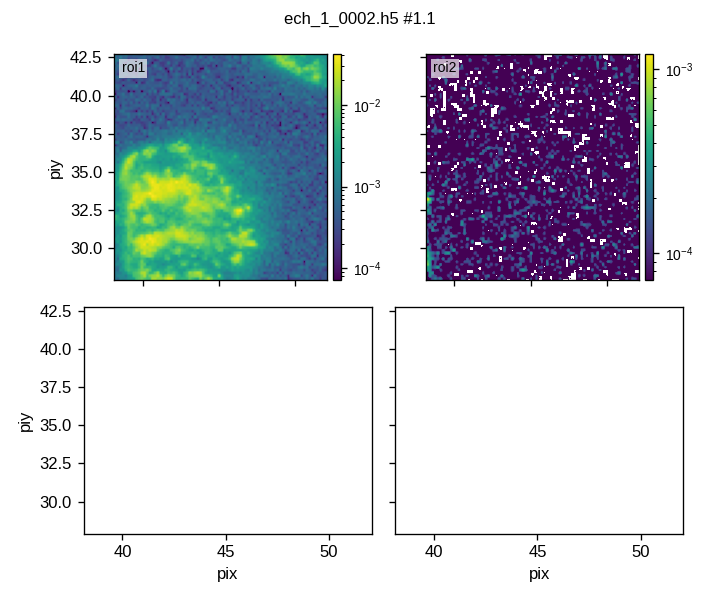

In [13]:
%matplotlib widget

rois   = [f'mpx1x4_roi{x}' for x in range(1,3)]
roi_i0 =  'ct11'

fig, axs = plt.subplots(2, 2, figsize=(6,5), sharex=True, sharey=True, dpi=120, layout='tight')
ax = axs.flatten()

mon = sxdm.io.bliss.get_roidata(path_dset, scan_no, roi_i0)
m0name, m1name = sxdm.io.bliss.get_piezo_motor_names(path_dset, scan_no)

for r, a in zip(rois, ax):
    roidata, m0, m1 = sxdm.io.bliss.get_roidata(path_dset, scan_no, r, return_pi_motors=True)
    pi_ext = [m0.min(), m0.max(), m1.min(), m1.max()]
    
    img = a.imshow(roidata / mon, extent=pi_ext, origin='lower', norm=LogNorm())
    
    label = sxdm.plot.add_roilabel(a, r.split('_')[-1])
    cbar  = sxdm.plot.add_colorbar(a, img, size='4%')
    
[a.set_xlabel(m0name) for a in (ax[2], ax[3])]
[a.set_ylabel(m1name) for a in (ax[0], ax[2])]

fig.suptitle(f"{os.path.basename(path_dset)} #{scan_no}", fontsize='medium')

## Mosaic

Plot a series of SXDM scans in hexapod coordinates - useful when making a "mosaic" of scans to cover a larger area. Select the ROI counter to plot by specifying it as the `counter` variable. Provide a scan list via `scans`. Check the signs of the hexapod vs piezo motors in `piezo_hexapod_dict` - these may be different from those below.

/tmp/ipykernel_1739772/3673152032.py:36: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(m0_pos, m1_pos, roidata / bckg, norm=mpl.colors.LogNorm(3e-2,.5))


Text(0.5, 1.0, 'ech_1_0001.h5\nmpx1x4_int')

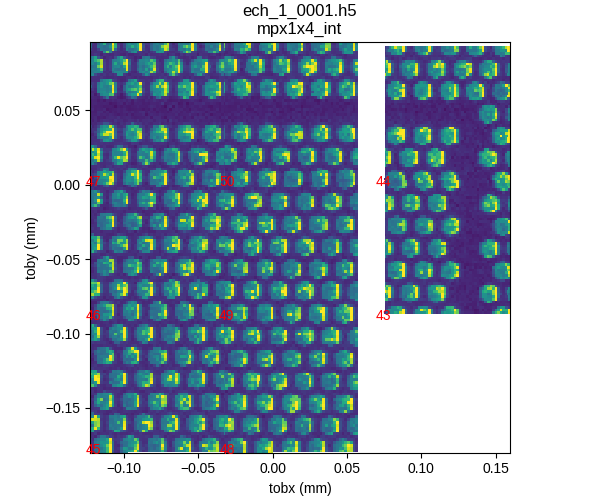

In [15]:
%matplotlib widget

name_sample = "ech_1"
name_dset = "0001"

path_dset = f"{path_exp}/{name_sample}/{name_sample}_{name_dset}/{name_sample}_{name_dset}.h5"

counter = "mpx1x4_int"
scans = range(43,51)

piezo_hexapod_dict = {
    "pix": {"hexa_mot": "tobx", "sign": +1},
    "piy": {"hexa_mot": "toby", "sign": +1},
    "piz": {"hexa_mot": "tobz", "sign": +1},
}

fig, ax = plt.subplots(figsize=(6, 5), layout="constrained", dpi=100)

for s in scans:
    try:
        roidata = sxdm.io.bliss.get_roidata(path_dset, f"{s}.1", counter)
        bckg = sxdm.io.bliss.get_roidata(path_dset, f"{s}.1", "ct11")

        m0name, m1name = sxdm.io.bliss.get_piezo_motor_names(path_dset, f"{s}.1")
        m0_pos, m1_pos = sxdm.io.bliss.get_piezo_motor_positions(path_dset, f"{s}.1")
        m0_hex, m1_hex = [
            id01lib.io.bliss.get_positioner(
                path_dset, f"{s}.1", piezo_hexapod_dict[m]["hexa_mot"]
            )
            for m in (m0name, m1name)
        ]

        m0_pos = m0_pos * piezo_hexapod_dict[m0name]["sign"] / 1e3 + m0_hex
        m1_pos = m1_pos * piezo_hexapod_dict[m1name]["sign"] / 1e3 + m1_hex

        ax.pcolormesh(m0_pos, m1_pos, roidata / bckg, norm=mpl.colors.LogNorm(3e-2, .5))

        ax.set_aspect("equal")
        ax.set_ylabel("{} (mm)".format(piezo_hexapod_dict[m1name]["hexa_mot"]))
        ax.set_xlabel("{} (mm)".format(piezo_hexapod_dict[m0name]["hexa_mot"]))
        ax.text(m0_hex, m1_hex, s, c='r')
    except:
        print(s)
        pass
    
title = f'{os.path.basename(path_dset)}\n{counter}'
ax.set_title(title)

## Frame sums

Sum an SXDM datasets over the two direct and two reiprocal space dimensions.

In [16]:
name_sample = "ech_1"
name_dset = "0001"
scan_no = '12.1'

path_dset = f"{path_exp}/{name_sample}/{name_sample}_{name_dset}/{name_sample}_{name_dset}.h5"

Text(0.5, 0.94, 'ech_1_0006.h5 #12.1')

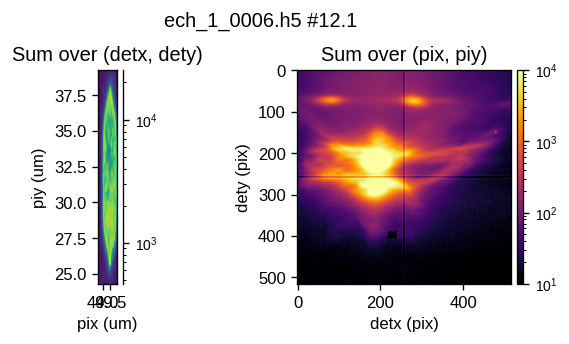

In [39]:
%matplotlib inline

fint = sxdm.io.bliss.get_sxdm_frame_sum(path_dset, scan_no)
dint = sxdm.io.bliss.get_roidata(path_dset, scan_no, 'mpx1x4_int')

fig, ax = plt.subplots(1,2, figsize=(6,3), layout='tight', dpi=120)

m0name, m1name = sxdm.io.bliss.get_piezo_motor_names(path_dset, scan_no)
m0, m1 = sxdm.io.bliss.get_piezo_motor_positions(path_dset, scan_no)
pi_ext = [m0.min(), m0.max(), m1.min(), m1.max()]

dmap = ax[0].imshow(dint, cmap='viridis', extent=pi_ext, norm=LogNorm())
fsum = ax[1].imshow(fint, norm=mpl.colors.LogNorm(10,1e4), origin='upper', cmap='inferno')

for a in ax:
    cbar = sxdm.plot.add_colorbar(a, a.get_images()[0])

ax[0].set_title('Sum over (detx, dety)')
ax[0].set_xlabel(f'{m0name} (um)')
ax[0].set_ylabel(f'{m1name} (um)')

ax[1].set_title(f'Sum over ({m0name}, {m1name})')
ax[1].set_xlabel('detx (pix)')
ax[1].set_ylabel('dety (pix)')

title = f"{os.path.basename(path_dset)} #{scan_no}"

fig.subplots_adjust(hspace=-.5)    
fig.suptitle(title, y=.94)

## GIFs

Gif of a 5D-SXDM dataset looking at ROI counters. Specify details:

In [18]:
name_sample = "ech_1"
name_dset = "0006"

path_dset = f"{path_exp}/{name_sample}/{name_sample}_{name_dset}/{name_sample}_{name_dset}.h5"
scan_nos = [f'{n}.1' for n in range(1,30)]

In [27]:
%matplotlib widget
%matplotlib widget

@gif.frame
def plotit(scan_no):

    rois = ['mpx1x4_int'] + [f'mpx1x4_roi{x}' for x in range(1,3)] 
    clims = [(400,1600), (50,800), (50, 800)]

    fig, axs = plt.subplots(1, 3, figsize=(8,2.6), sharex=True, sharey=True, dpi=120, layout='tight')
    ax = axs.flatten()

    mon = sxdm.io.bliss.get_roidata(path_dset, scan_no, 'ct11')
    for r, a, c in zip(rois, ax, clims):
        roidata, pix, piy = sxdm.io.bliss.get_roidata(path_dset, scan_no, r, return_pi_motors=True)
        pi_ext = [pix.min(), pix.max(), piy.min(), piy.max()]

        img = a.imshow(roidata / mon, extent=pi_ext, origin='lower', norm=LogNorm()) # *c

        label = sxdm.plot.add_roilabel(a, r.split('_')[-1])
        cbar  = sxdm.plot.add_colorbar(a, img, size='4%')

    ax[1].set_xlabel('pix')
    ax[0].set_ylabel('piy') 

    eta = sxdm.io.bliss.get_positioner(path_dset, scan_no, 'eta')
    fig.suptitle(f"{os.path.basename(path_dset)} #{scan_no} @ $\eta = {eta:.3f}\degree$", fontsize='medium')

Test function:

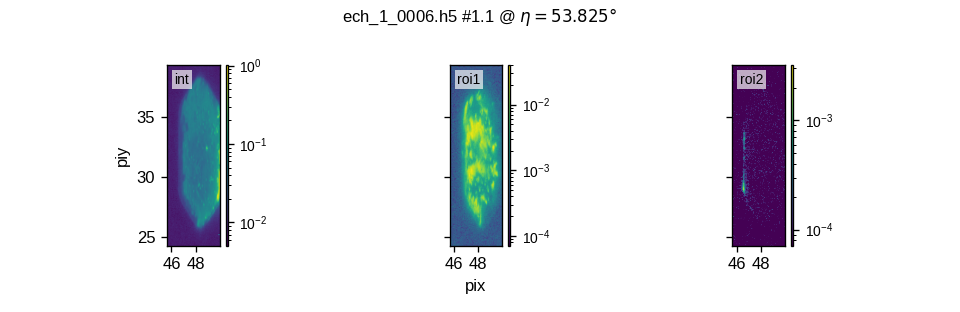

In [28]:
plotit('1.1')

Generate gif:

In [19]:
frames = [plotit(s) for s in scan_nos]
gif.save(
    frames,
    f"macro_{os.path.basename(path_dset)}_rois.gif",
    duration=5,
    unit="seconds",
    between="startend",
)

Gif of a 5D-SXDM dataset plotting the frame sums.

In [32]:
name_sample = "ech_1"
name_dset = "0006"

path_dset = f"{path_exp}/{name_sample}/{name_sample}_{name_dset}/{name_sample}_{name_dset}.h5"
scan_nos = [f'{n}.1' for n in range(1,30)]

In [40]:
@gif.frame
def plot_sums(scan_no, roi_name="mpx1x4_int"):

    fint = sxdm.io.bliss.get_sxdm_frame_sum(path_dset, scan_no)
    dint = sxdm.io.bliss.get_roidata(path_dset, scan_no, roi_name)

    fig, ax = plt.subplots(1, 2, figsize=(6, 3), layout="tight", dpi=120)

    m0name, m1name = sxdm.io.bliss.get_piezo_motor_names(path_dset, scan_no)
    m0, m1 = sxdm.io.bliss.get_piezo_motor_positions(path_dset, scan_no)
    pi_ext = [m0.min(), m0.max(), m1.min(), m1.max()]

    dmap = ax[0].imshow(dint, cmap="viridis", extent=pi_ext, norm=LogNorm())
    fsum = ax[1].imshow(
        fint, norm=mpl.colors.LogNorm(10, 1e4), origin="upper", cmap="inferno"
    )

    for a in ax:
        cbar = sxdm.plot.add_colorbar(a, a.get_images()[0])

    ax[0].set_title("Sum over (detx, dety)")
    ax[0].set_xlabel(f"{m0name} (um)")
    ax[0].set_ylabel(f"{m1name} (um)")

    ax[1].set_title(f"Sum over ({m0name}, {m1name})")
    ax[1].set_xlabel("detx (pix)")
    ax[1].set_ylabel("dety (pix)")

    eta = sxdm.io.bliss.get_positioner(path_dset, scan_no, "eta")
    title = f"{os.path.basename(path_dset)} #{scan_no} @ $\eta={eta:.3f}$"

    fig.subplots_adjust(hspace=-0.5)
    fig.suptitle(title, y=0.94)

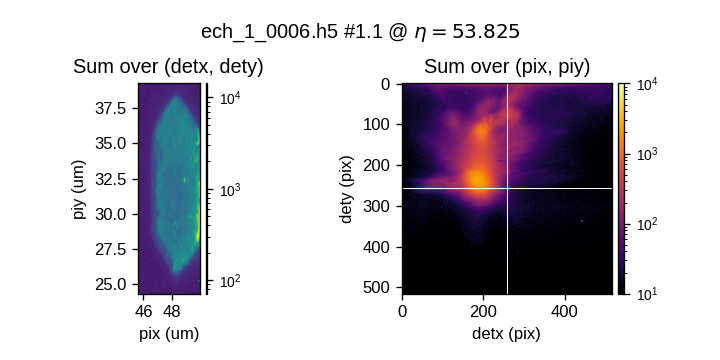

In [41]:
plot_sums('1.1')

In [ ]:
frames = [plotit(s) for s in scan_nos]
gif.save(
    frames,
    f"macro_{os.path.basename(path_dset)}_framesums.gif",
    duration=5,
    unit="seconds",
    between="startend",
)

# Mesh 

In [ ]:
name_sample = 'e21095'
name_dset = '0005'

path_dset = f'{path_exp}/{name_sample}/{name_sample}_{name_dset}/{name_sample}_{name_dset}.h5'

In [ ]:
scan_nos = 

fig = plt.figure()

for s in scan_nos:
    x, y = [sxdm.io.bliss.get_positioner(path_dset, f'{s}.1', f'th{m}') for m in ('x', 'y')]

    _i = sxdm.io.bliss.get_roidata(path_dset, f'{s}.1', 'mpx1x4_int')
    _m = sxdm.io.bliss.get_roidata(path_dset, f'{s}.1', 'ct11')
    topl = (_i / _m)
    topl = _i
    
    x, y = x.reshape(topl.shape), y.reshape(topl.shape)
    plt.pcolormesh(x, y, topl, norm=LogNorm(4e5,))
    
    plt.axis('image')
    ax = plt.gca()
    ax.invert_yaxis()
    
plt.xlabel('thy (mm)')
plt.ylabel('thx (mm)')
plt.colorbar()
plt.title(f'{os.path.basename(path_dset)} #{scan_nos}')

# RSMs

In [42]:
name_sample = "ech_1"
name_dset = "0001"

path_dset = f"{path_exp}/{name_sample}/{name_sample}_{name_dset}/{name_sample}_{name_dset}.h5"

with h5py.File(path_dset, 'r') as h5f:
    for s in sorted(h5f.keys(), key=lambda a: int(a.split('.')[0])):
        title = h5f[f'{s}/title'][()].decode()
        if 'eta' in title:
            print(f'{s:5} {title}')

8.1   ascan eta 12.75 18.75 300 1
9.1   ascan eta 15.91 15.95 30 0.1
10.1  ascan eta 54.34 54.74 30 0.1
11.1  ascan eta 52.61 56.61 50 1
75.1  ascan eta 52.88 55.88 50 1
76.1  ascan eta 53.33 55.33 50 1
77.1  a2scan eta 53.33 55.33 delta 107.09 111.09 50 1
78.1  a2scan eta 53.83 54.83 delta 108.09 110.09 30 1


In [43]:
scan_no = '77.1'

In [44]:
# load sum of all frames in selected rocking curve
# from the dataset
with h5py.File(path_dset) as h5f:
    frames_sum = h5f[f'{scan_no}/measurement/mpx1x4/'][()].sum(0)
    
# make the mask (after inspection of frame sum)
mask = np.zeros_like(frames_sum)
mask[frames_sum > 1e7] = 1
mask[387:403, 217:241] = 1

# load detector object with mask applied
mpx = id01lib.xrd.detectors.MaxiPix(mask=mask)

In [45]:
# %matplotlib widget

# plt.figure(figsize=(3,3))
# plt.imshow(np.ma.masked_array(frames_sum, mask), norm=LogNorm(), origin='upper')

In [46]:
nu, delta, phi, eta = [
    id01lib.io.bliss.get_positioner(path_dset, scan_no, x)
    for x in ["nu", "delta", "phi", "eta"]
]

In [47]:
qxg, qyg, qzg, gint = id01lib.xrd.qspace.bliss.get_qspace_gridded(
    path_dset, 
    scan_no, 
    nbins=(-1,-1,-1), 
    offsets=dict(phi=phi, nu=0, delta=0),
    det=mpx,
#     median_filter=[3,3,3]
)

Using cen_pix: row/y=91.505, col/x=180.760
Using det_dist = 0.97038 m
Using energy = 8.79970 keV
NOT correcting the central pixel for mpxy=0.0, mpxz=10.0
------------------
Subtracting -0.635 from phi

Max. number of bins: (511, 514, 68)
Using binning: [511, 514, 68]


Text(0.5, 0.98, 'ech_1_0001 #77.1')

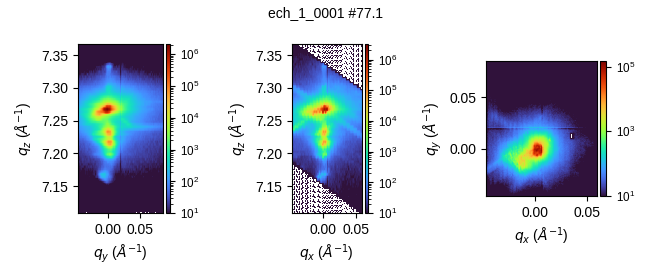

In [48]:
%matplotlib widget

fig, ax = plt.subplots(1,3, figsize=(6.5,2.8), dpi=100, layout='tight', gridspec_kw={'width_ratios':[.75,1,.9]})

for i, a in enumerate(ax):
    _int = gint.sum(i).T
    _ext = sxdm.utils.get_q_extents(qxg, qyg, qzg)[i]
    
    im = a.imshow(_int, extent=_ext, norm=mpl.colors.LogNorm(10,), cmap='turbo')
    cbar = sxdm.plot.add_colorbar(a, im, size='5%', pad=.03)
    
for i in (0,1):
    ax[i].set_ylabel(r'$q_z$ ($\AA^{-1}$)')
    
for i in (1,2):
    ax[i].set_xlabel(r'$q_x$ ($\AA^{-1}$)')
    
ax[0].set_xlabel(r'$q_y$ ($\AA^{-1}$)')
ax[2].set_ylabel(r'$q_y$ ($\AA^{-1}$)')

sample_name = path_dset.split('/')[-2]
title  = fr'{sample_name} #{scan_no}'

fig.suptitle(title, fontsize='medium')

IntSlider(value=50, max=67)

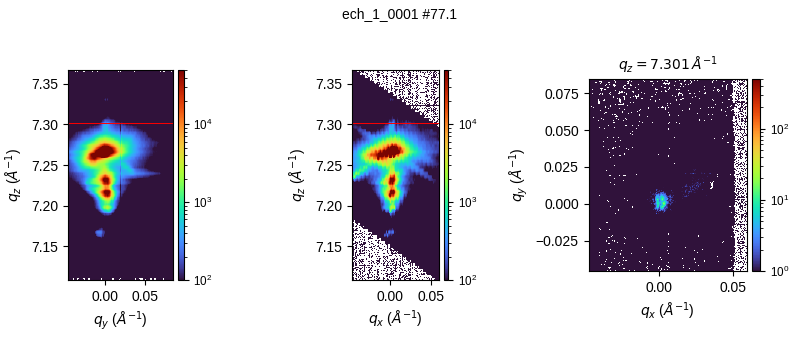

In [50]:
%matplotlib widget
%matplotlib widget

i0 = 50

fig, ax = plt.subplots(1,3,figsize=(8, 3.5), dpi=100, gridspec_kw={'width_ratios':[1,1,1]})

_ext = sxdm.utils.get_q_extents(qxg, qyg, qzg)
im0 = ax[0].imshow(gint.sum(0).T, extent=_ext[0], norm=mpl.colors.LogNorm(100,5e4), cmap='turbo')

ax[0].set_xlabel(r'$q_y$ ($\AA^{-1}$)')
ax[0].set_ylabel(r'$q_z$ ($\AA^{-1}$)')

im1 = ax[1].imshow(gint.sum(1).T, extent=_ext[1], norm=mpl.colors.LogNorm(100,5e4), cmap='turbo')
ax[1].set_xlabel(r'$q_x$ ($\AA^{-1}$)')
ax[1].set_ylabel(r'$q_z$ ($\AA^{-1}$)')

lines0 = [ax[i].axhline(qzg[i0], c='r', lw=0.7) for i in (0,1)]

imslice = ax[2].imshow(gint[...,i0].T, extent=_ext[2], norm=mpl.colors.LogNorm(1, 500), cmap='turbo')

ax[2].set_xlabel(r'$q_x$ ($\AA^{-1}$)')
ax[2].set_ylabel(r'$q_y$ ($\AA^{-1}$)')
ax[2].set_title(f'$q_z = {qzg[i0]:.3f}\,\AA^{{-1}}$', fontsize='medium')

for a in ax:
    cbar = sxdm.plot.add_colorbar(a, a.get_images()[0], size='5%')
    
sample_name = path_dset.split('/')[-2]
title  = fr'{sample_name} #{scan_no}'
fig.suptitle(title, fontsize='medium');

fig.subplots_adjust(left=.05, right=.95, bottom=.2, top=.8, wspace=.6)
    
def sliceit(change):
    i0 = change['new']
    _0 = [l.set_ydata(qzg[i0]) for l in lines0]
    imslice.set_data(gint[...,i0].T)
    
    ax[2].set_title(f'$q_z = {qzg[i0]:.3f}\,\AA^{{-1}}$', fontsize='medium')
    
    fig.canvas.draw()
    
slider = ipw.IntSlider(value=i0, min=0, max=gint.shape[2]-1) 
slider.observe(sliceit, names='value')
slider

# Calc

In [27]:
mat = xu.materials.Crystal.fromCIF('./Si.cif') 
# qconv = xu.QConversion(('y-', 'z-'), ('z-', 'y-'), (1,0,0)) # eta, phi, nu, del
qconv = xu.QConversion(('y-', 'z-'), ('y-'), (1,0,0)) # eta, phi, del
hxrd = xu.FourC(mat.Q(1,1,0), mat.Q(0,0,1), en=11150, qconv=qconv)

def get_angles(hkl):
    
    # q-space coordinates of hkl 
    q_material = mat.Q(hkl)
    q_lab = hxrd.Transform(q_material)
    
    # angular limits -- eta, phi, nu, delta
#     bounds = ((47, 110), (-110, 110), (0, 90), (-6, 140))
    bounds = ((1, 110), (-110, 110), (0, 130))

    # compute diffractometer angles from q-space coords.
    ang, qerror, errcode = xu.Q2AngFit(q_lab, hxrd, bounds)
    
    return np.round(ang, 5)

hkl = 2,4,6
#hkl = -2,4,6
#hkl = 4,2,6
#hkl = 4,-2,6

print("")
print(*[f'\t{x}: {y:.4f}\n' for x,y in zip('eta,phi,delta'.split(','), get_angles(hkl))])

XU.materials: element Si used instead of Si0+

	eta: 86.7086
 	phi: 18.4350
 	delta: 100.0186



# BLISS macros

In [13]:
def mosaic_scan():
    x0, y0 = tobx.position, toby.position
    for i in np.arange(-0.181, 0.181, 0.09):
        for j in np.arange(-0.181, 0.181, 0.09):
            umv(tobx, x0+i, toby, y0+j)
            dsxdm(pix, -48, 48, 100, piy, -48, 48, 100, .01)
    umv(tobx, x0, toby, y0)

13.333333333333336

In [34]:
100**2*0.01/60

1.6666666666666667

In [33]:
for i in np.arange(-0.181, 0.181, 0.09):
    for j in np.arange(-0.181, 0.181, 0.09):
        print(i, j)

-0.181 -0.181
-0.181 -0.091
-0.181 -0.0010000000000000009
-0.181 0.08900000000000002
-0.181 0.179
-0.091 -0.181
-0.091 -0.091
-0.091 -0.0010000000000000009
-0.091 0.08900000000000002
-0.091 0.179
-0.0010000000000000009 -0.181
-0.0010000000000000009 -0.091
-0.0010000000000000009 -0.0010000000000000009
-0.0010000000000000009 0.08900000000000002
-0.0010000000000000009 0.179
0.08900000000000002 -0.181
0.08900000000000002 -0.091
0.08900000000000002 -0.0010000000000000009
0.08900000000000002 0.08900000000000002
0.08900000000000002 0.179
0.179 -0.181
0.179 -0.091
0.179 -0.0010000000000000009
0.179 0.08900000000000002
0.179 0.179


In [166]:
(200**2 * 0.01 * 40) / 3600

4.444444444444445